In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud



In [2]:

# Load the data from the CSV file
data = pd.read_csv('data/P3-text.csv')



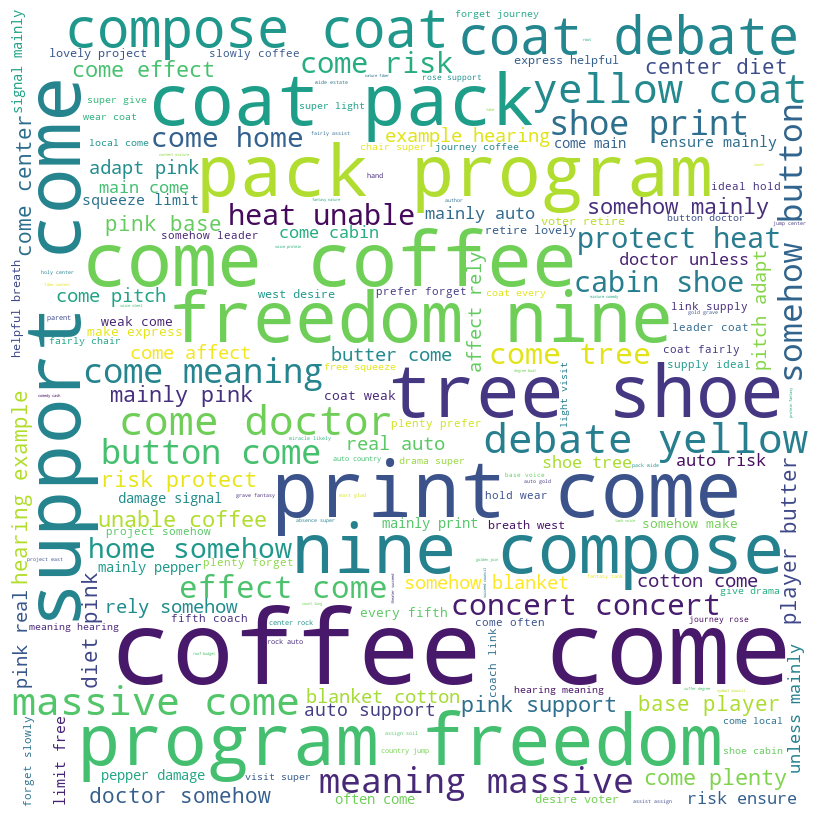

In [3]:
# Combine text data into a single string
text = " ".join(data["text_mapped"].values)

# Create word cloud
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)



In [4]:
# Convert the text data to a numeric vector representation using the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text_mapped'])



In [5]:
# Cluster the data using the KMeans algorithm
num_clusters = 50  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
# Add the cluster IDs to the DataFrame
data['cluster_id'] = kmeans.labels_

# Save the clustered data to a new CSV file
data.to_csv('P3-clustered.csv', index=False)



   Unnamed: 0 text_mapped  cluster_id
0          13     concert           6
1          32     concert           6
2         186   tree shoe           5
3         187   tree shoe           5
4         272     concert           6


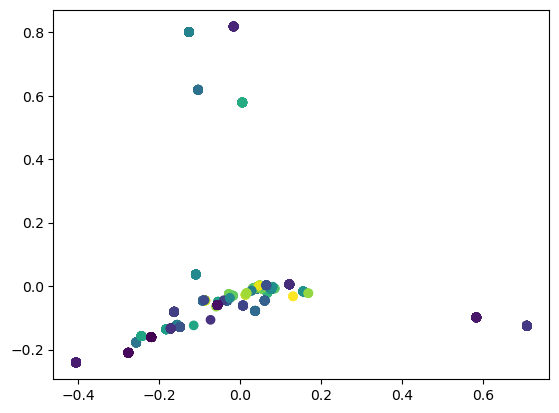

In [6]:
# Convert the vectorized data to two dimensions using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

# Create a scatter plot of the clustered data
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=data['cluster_id'])
plt.show()